In [3]:
# General informations that would be used for the rest of the notetaking

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors
from IPython.display import HTML

plt.ioff() # isso é p n ficar mostrando as figuras sem eu querer
 
plt.rcParams["mathtext.fontset"] = "cm" # Fonte matemática pro latex
plt.rc('font', family='serif') # fonte tipo serif, p fica paredico com latex msm
plt.rc('text', usetex=False) # esse vc deixa True e for salvar em pdf e False se for p salvar png

rgb_light =  ['#ce5825','#2e9a60','#6182e2']
rgb_pallet = ['#cd4100','#007148','#4169E1']
rgb_darker = ['#9e3000','#005738','#304ea6']

cym_light =  ['#82e7ff','#fde974','#ff98ff']
cym_pallet = ['#00ceff','#ffd700','#ff6dff']
cym_pallet = ['#007a96','#b39700','#b04bb0']

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [rgb_pallet[2],"white",rgb_pallet[0]])
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", [rgb_pallet[2],"black",rgb_pallet[0]])



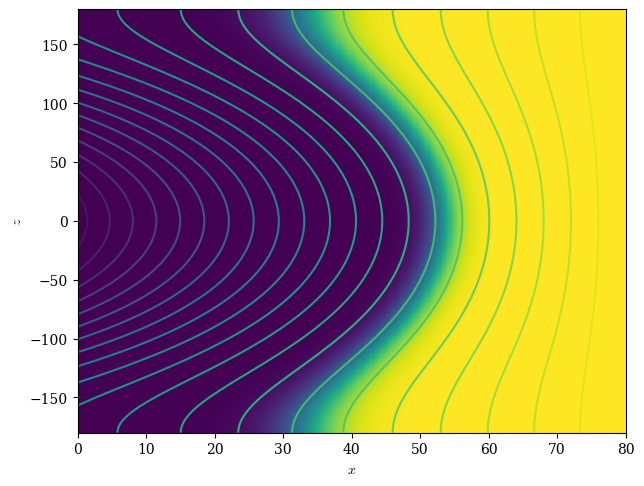

In [7]:


def A(x,z,Lx,Lz):
    return (4/5)*(x-Lx) + (Lz/(10*np.pi))*np.sinh(2*np.pi*(x - Lx)/Lz)*np.cos(2*np.pi*z/Lz)

def Ueq(A,Leq,Lgs):
    return 0.5*np.tanh((A-Lgs)/Leq)




x = np.linspace(0,80,500)
z = np.linspace(-180,+180,500)
xx , zz = np.meshgrid(x,z)


Lx = 80
Lz = 360
Leq = 12/5 + (3/5)*np.cosh(2*np.pi*Lx/(3*Lz))

Lgs = -4*Lx/15 + (-Lz/(10*np.pi))*np.sinh(2*np.pi*Lx/(3*Lz))
Af = A(xx,zz,80,360)
Ueqf = Ueq(Af,Leq,Lgs)


fig, ax = plt.subplots()
fig.set_size_inches(18*0.393, 14*0.393) # diminuir na metade p 
ax.set_ylabel("$z$")
ax.set_xlabel("$x$")
axisplot2  = ax.pcolormesh(xx,zz,Ueqf, vmin = -0.5, vmax= 0.5)
axisplot  = ax.contour(xx,zz,Af, levels = 25)

plt.show()



